# Régression linéaire par moindres carrés
## Implémentation de l'algorithme des moindres carrés

Les imports du notebook complet :

In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
%matplotlib notebook

In [7]:
import random
from sklearn import neighbors
from sklearn.datasets import load_iris  # les donn ́ees iris sont charg ́ees
from sklearn.datasets import load_boston  # les donn ́ees iris sont charg ́ees
from sklearn.datasets import load_diabetes  # les donn ́ees iris sont charg ́ees
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pylab as pl  # permet de remplacer le nom "pylab" par "pl"
import numpy as np
import statistics as stat

Soit l'algorithme de régression linéaire par moindre carrés suivant : <br>
1) Ajouter le vecteur 1 à la matrice $X \in \mathbb{R}^{n x d}$ contenant les données $x_{i=1}^{n}$<br>
2) Calculer $w = (X^{T}X)^{-1}X^{T}y$, avec $y = y_{i=1}^{n} \in \mathbb{R}^{n}$<br>
3) Retourner $w$<br>
On se propose de coder l'implémentation de la régression linéaire par moindre carrés :

In [8]:
def reg(X, Y):
    ones = np.ones((len(X), 1))
    Xb = np.concatenate((X, ones), axis=1)
    
    Xt = np.transpose(Xb)
    w = np.dot(np.dot(np.linalg.inv(np.dot(Xt, Xb)), Xt), Y)
    
    print("w =", w)
    return w

Pour la réalisation de l'exercice nous utiliserons un jeu de données bi-dimensionnelle contenues dans un fichier.<br>
On ouvre le fichier et on stocke les valeurs dans 2 variables ($x$ et $y$) que nous réutiliserons par la suite.<br>
La variable $x$ est un vecteur en 2 dimensions, la variable $y$ est en 1 dimension.

In [9]:
# Lire le fichier
tt = np.loadtxt("dataRegLin2D.txt")
x = tt[:, :2]
y = tt[:, -1]

On représente les données sur un graphe en 3 dimensions :

<IPython.core.display.Javascript object>


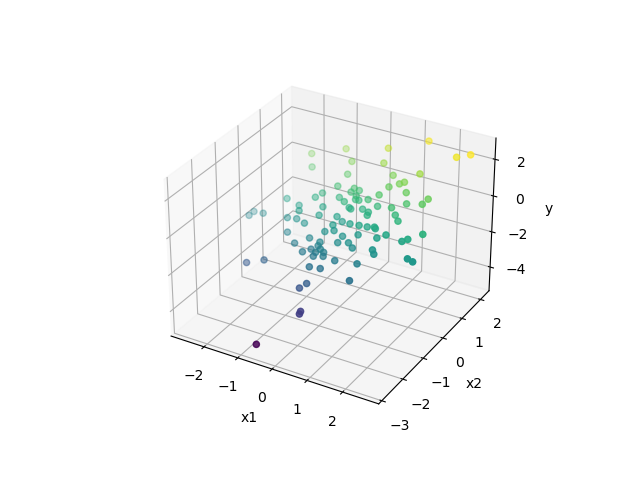

In [10]:
def graph3D(x,y):
    fig = pl.figure("Visualisation du jeu de données")
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0],x[:,1],y, c=y)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    pl.show()

# Graphe 3D
graph3D(x,y)

A première vue il y a une dépendance linéaire entre les étiquettes $x_{i}^{1}$, $x_{i}^{2}$ et $y_i$ selon l'angle de vue.

On va donc chercher si les valeurs sont bien dépendantes ou non. Pour cela on affiche les résultats de la régression linéaire des valeurs du fichier sur un graphe en 2D.<br>
En premier lieu on étudie les dépendances entre les étiquettes $x_{i}^{1}$ et $y_i$ (en <span style="color:red">rouge</span>) puis les étiquettes $x_{i}^{2}$ et $y_i$ (en <span style="color:blue">bleu</span>).

<IPython.core.display.Javascript object>


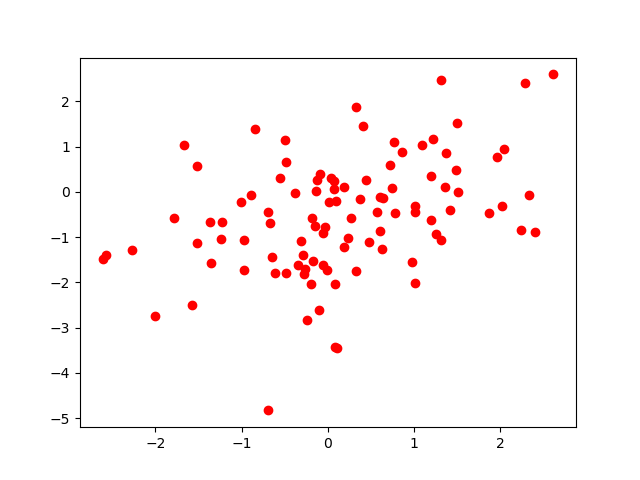

<IPython.core.display.Javascript object>


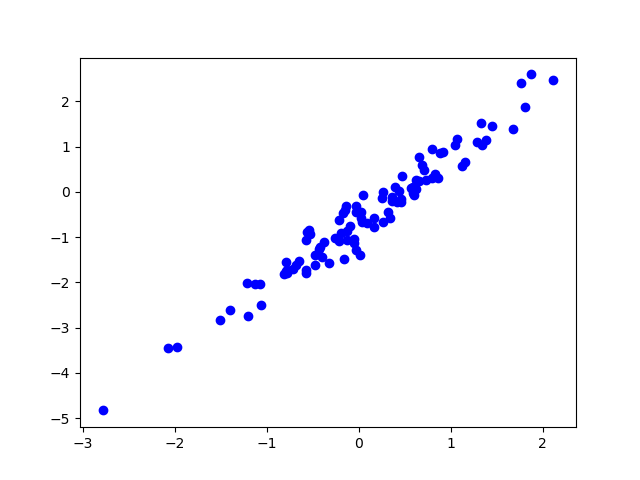

In [11]:
# Première étiquette
pl.figure("x^(1)")
pl.scatter(x[:, 0], y, c='red')
pl.show()

# Seconde étiquette
pl.figure("x^(2)")
pl.scatter(x[:, 1], y, c='blue')
pl.show()

On peut voir que les données de la <span style="color:red">première dimension</span> de x (i.e $x_{i}^{1}$) est "mal" répartie et produit une dispersion de points qui ne semblent pas avoir de cohérences entre eux.<br>
L'inverse se produit pour les données de la <span style="color:blue">seconde dimension</span> de x (i.e $x_{i}^{2}$) qui ont l'air d'être facilement approchées par une droite de régression.

On cherche maintenant à calculer les droites de régression dans chacun des cas :

w = [ 0.44979209 -0.59832595]
w = [ 1.43100678 -0.64475543]


<IPython.core.display.Javascript object>


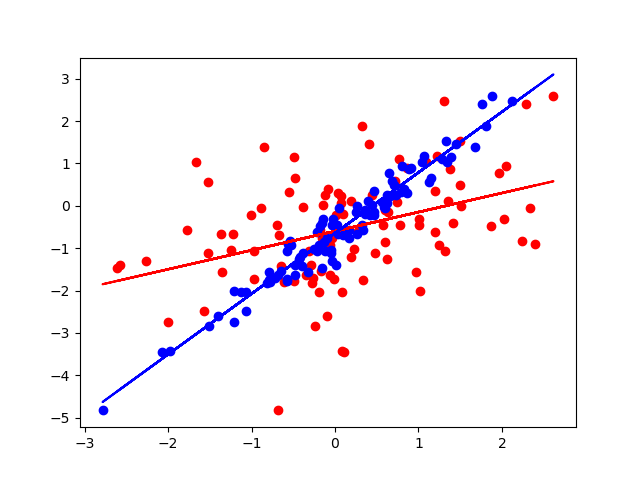

In [12]:
# Paramètres de régression
x0p = reg(x[:, [0]], y)  # [ 0.44979209 -0.59832595]
x1p = reg(x[:, [1]], y)  # [ 1.43100678 -0.64475543]
    
def lin(x, xp):
    return xp[0] * x + xp[1]
    
# Graphiques 2D
pl.figure("Plotting des valeurs de x et leur droites de régression calculées")
pl.scatter(x[:, 0], y, c='red')
pl.scatter(x[:, 1], y, c='blue')
pl.plot(x, lin(x, x0p), color='red')
pl.plot(x, lin(x, x1p), color='blue')
pl.show()

On peut remarquer que les points <span style="color:red">rouge</span> de $x_{i}^{1}$ et $y_{i}$ sont dispersés et la droite de régression qui les représente passe grossièrement au milieu de tous les points, mais la cohérence des points entre eux est faible.<br>
En revanche les points <span style="color:blue">bleus</span> sont bien alignés et la droite de régression qui en résulte est  proche des points.

On va calculer un vecteur de pondération <i>w</i> afin de réaliser une fonction qui à partir de valeurs $x_{test}$ permet de prédire le label $y_{test}$ :

In [13]:
# Ensembles de test et d'entraînement
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,
                                                        random_state=random.seed(123))# Calcul du vecteur de pondération w

w = reg(X_train, Y_train)

w = [ 0.24612168  1.368583   -0.67852414]


On donne la formule de la fonction de la droite de régression, soit $x \in \mathbb{R}^{2}, f(x) =  w_{1}.x_{1} + w_{2}.x_{2} + w_{3}$

In [14]:
def pred_reg(x, w):
    return w[0]*x[0] + w[1]*x[1] +  w[2]

In [15]:
# Calcul de l'erreur au carré entre les valeurs prédites et celles de l'ensemble des données réelles
err_pred = []
for i in range(len(X_test)):
    # Calcul de la valeur prédite
    y_pred = pred_reg(X_test[i], w)
    # Différence entre le label prédit et le label réel
    err_pred.append(abs(Y_test[i] - y_pred)**2)
print(err_pred[:10], "...")

[0.044223302051653604, 0.0015441287204247078, 0.004930384930375099, 5.555762221961226e-07, 2.148660761885772e-05, 0.025003593936247112, 0.0034759575485189703, 0.0012883542900516767, 0.0004602981778828322, 0.005663417712737996] ...


In [16]:
# Moyenne d'erreur carrée
stat.mean(err_pred)

0.009589354020734624

On trouve une prédiction proche à 2 décimales en moyenne des valeurs d'origines grâce à la fonction de prédiction entraînée par la méthode des moindres carrés.

### Conclusion
On peut voir que les données en entrées qui semblaient, prises à part, être sans aucun lien, possède bien une corrélation qui permettent ensemble de déduire un modèle linéaire fiable avec une erreur à $10^{-2}$ environ par rapport aux données réelles.

# Régression linéaire avec Scikit-learn
## Sur les mêmes données simulées

Nous avons jusque là réalisé la méthode "à la main" en suivant l'algorithme de régression linéaire des moindres carrés.<br>
Maintenant nous allons réaliser implémenter et analyser de nouveaux algorithmes de régressions linéaires avec la librairie Scikit-learn.<br>

Pour commencer on va recalculer avec les nouveaux outils les données de l'exercice précédent.

In [17]:
model = LinearRegression().fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9926093524270219
intercept: -0.6785241409860728
slope: [0.24612168 1.368583  ]


Pour rappel nous avions trouvé comme paramètres :

In [18]:
w

array([ 0.24612168,  1.368583  , -0.67852414])

In [19]:
# Prédictions des labels y
y_pred = model.predict(X_test)
print(y_pred[:10], "...")

[-1.41388663 -0.4121716  -0.2934007   1.51647463  0.86951436  1.26982525
  0.05138445 -0.85468735  0.91909044 -1.60986568] ...


In [20]:
# Formatage des données
pred = np.array(y_pred).reshape(-1, 1)

# Calcul de l'erreur moyenne carré pour chaque valeurs
print(mean_squared_error(Y_test, y_pred))

0.009589354020734641


La prédiction calculée par scikit-learn est identique à celle trouvée précédemment.

On peut appliquer cette méthode sur des jeux de données réels différents, par exemple le prix des maison à Boston ou sur les chiffres du diabète.<br>

## Sur des données réelles
### Diabète
Chargement des données depuis scikit-learn.<br>

In [21]:
# Chargement des données de diabète
diabete = load_diabetes()
X_diabete = diabete.data
Y_diabete = diabete.target

Les attributs disponibles dans ces données sont :
- age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level

On réalise un jeu de données et on calcule la régression linéaire avec scikit-learn.

In [22]:
# jeux de données de tests et d'entrainements créés à partir de l'ensemble des données importées
X_train, X_test, Y_train, Y_test = train_test_split(X_diabete, Y_diabete, test_size=0.3,
                                                        random_state=random.seed(123))
#Calcul du modèle de régression linéaire
model = LinearRegression().fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Prédiction de données à partir des données de test
y_pred = model.predict(X_test)

coefficient of determination: 0.533836660614872
intercept: 154.74896937837025
slope: [  29.28104218 -285.02494999  386.91395666  362.36759631 -956.07688004
  651.91167093   82.78123879    5.67024376  967.52244109   68.36731603]


In [23]:
# Moyenne de l'erreur au carré
print(mean_squared_error(Y_test, y_pred))

3670.432931147884


L'erreur au carré est très importante, le modèle n'est pas bon.

### Boston<br>
Chargement des données depuis scikit-learn.<br>

In [24]:
# Chargement des données de Boston
boston = load_boston()
X_boston = boston.data
Y_boston = boston.target

Les attributs du jeu de données sont :
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in \$1000’s

On réalise un jeu de données et on calcule la régression linéaire avec scikit-learn.

In [25]:
# jeux de données de tests et d'entrainements créés à partir de l'ensemble des données importées
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))

#Calcul du modèle de régression linéaire
model = LinearRegression().fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Prédiction de données à partir des données de test
y_pred = model.predict(X_test)

coefficient of determination: 0.7411759748050651
intercept: 45.20410467431393
slope: [-1.48243969e-01  5.91568319e-02 -4.20942432e-03  2.27143249e+00
 -1.97919466e+01  3.07703826e+00 -5.32513468e-03 -1.82916666e+00
  3.62638162e-01 -1.39330935e-02 -9.93678687e-01  1.00069018e-02
 -5.39836749e-01]


In [26]:
# Moyenne de l'erreur au carré
print(mean_squared_error(Y_test, y_pred))

19.82925165911131


L'écart est moins important entre le modèle prédit et les données réelles, il est possible que le modèle soit bon.

## Régression par Ridge et Lasso
La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d’éviter le risque de sur-apprentissage.<br>
Nous allons appliquer une régression Ridge et Lasso avec un coefficient $\alpha = 1.0$ sur les données de Boston et comparer les deux solutions.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))

# alp signifie que le coefficient alpha utilisé est celui par défaut, False sinon pour calculer un coefficient optimisé
def ridge_boston(alp):
    alpha = 1.0 if alp else alphaRidge(X_train, Y_train)['alpha']
    print("alpha =", alpha)

    model = Ridge(alpha=alpha).fit(X_train, Y_train)
    r_sq = model.score(X_train, Y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    # Prédiction
    y_pred = model.predict(X_test)
    print('Erreur moyenne carrée :', mean_squared_error(Y_test, y_pred))

# alp signifie que le coefficient alpha utilisé est celui par défaut, False sinon pour calculer un coefficient optimisé
def lasso_boston(alp):
    alpha = 1.0 if alp else alphaLasso(X_train, Y_train)['alpha']
    print("alpha =", alpha)

    model = Lasso(alpha=alpha).fit(X_train, Y_train)
    r_sq = model.score(X_train, Y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    # Prédiction
    y_pred = model.predict(X_test)
    print('Erreur moyenne carrée :', mean_squared_error(Y_test, y_pred))

In [28]:
# Calcul du modèle de régression linéaire par Ridge
# True signifie que le coefficient alpha utilisé est celui par défaut
ridge_boston(True)

alpha = 1.0
coefficient of determination: 0.7382457700775402
intercept: 38.28690338183312
slope: [-1.39279872e-01  5.84160723e-02  4.34788846e-02  2.69162458e+00
 -1.19369608e+01  3.13100744e+00  7.76913427e-03 -1.35574942e+00
  3.30520464e-01 -1.36994242e-02 -1.00687024e+00  1.03860654e-02
 -5.98760289e-01]
Erreur moyenne carrée : 22.528870949501336


In [29]:
# Calcul du modèle de régression linéaire par Lasso
# True signifie que le coefficient alpha utilisé est celui par défaut
lasso_boston(True)

alpha = 1.0
coefficient of determination: 0.6780317580227746
intercept: 43.24718955158362
slope: [-0.08774832  0.06008142 -0.          0.         -0.          0.51095455
  0.03618884 -0.58141098  0.28597227 -0.01499593 -0.77852756  0.0094617
 -0.78835571]
Erreur moyenne carrée : 28.59737598463849


Les deux méthodes donnent des résultats proches entre eux et par rapport à la méthode des moindres carrés.<br>
Nous allons maintenant chercher à calculer le meilleur coefficent $\alpha$ pour les deux nouvelles méthodes de régression linéaire. Pour cela nous utiliserons la méthode de cross-validation sur une grille de valeurs.

In [30]:
## Méthodes pour déterminer le meilleure coefficient alpha les régressions par Ridge et Lasso

def alphaRidge(X, y):
    alphas = np.logspace(-3, -1, 20)
    gscv = GridSearchCV(Ridge(), dict(alpha=alphas), cv=5).fit(X, y)
    return gscv.best_params_


def alphaLasso(X, y):
    alphas = np.logspace(-3, -1, 20)
    gscv = GridSearchCV(Lasso(), dict(alpha=alphas), cv=5).fit(X, y)
    return gscv.best_params_

In [31]:
# Calcul du meilleur coefficient alpha pour la méthode du Ridge
alpha = alphaRidge(X_train, Y_train)['alpha']
alpha

0.0379269019073225

In [32]:
# Calcul du meilleur coefficient alpha pour la méthode du Lasso
alpha = alphaLasso(X_train, Y_train)['alpha']
alpha

0.001

On peut donc utiliser le meilleur coefficient $\alpha$ pour les deux méthodes :

In [33]:
# False signifie que le coefficient alpha utilisé est celui optimisé par le calcul d'un coefficient en 
# fonction des jeux de données
ridge_boston(False)

alpha = 0.0379269019073225
coefficient of determination: 0.7425665384015676
intercept: 45.773331777560244
slope: [-1.49696979e-01  5.65310335e-02  9.19822455e-02  2.89106000e+00
 -2.20749664e+01  3.04867527e+00  1.66063153e-02 -1.50138629e+00
  3.57455650e-01 -1.27898481e-02 -1.13496116e+00  9.75452154e-03
 -5.92106606e-01]
Erreur moyenne carrée : 23.370277318350162


In [34]:
# False signifie que le coefficient alpha utilisé est celui optimisé par le calcul d'un coefficient en 
# fonction des jeux de données
lasso_boston(False)

alpha = 0.001
coefficient of determination: 0.7425835670145574
intercept: 46.10922697965985
slope: [-1.50145024e-01  5.64472777e-02  9.40418345e-02  2.88435312e+00
 -2.25055646e+01  3.04243405e+00  1.70323119e-02 -1.50715743e+00
  3.58694818e-01 -1.27553590e-02 -1.14045883e+00  9.72811976e-03
 -5.92048671e-01]
Erreur moyenne carrée : 23.420942537321565


Avec la valeur du coefficient $\alpha$ optimisé, on se rend compte que les deux modèles de régression renvoient des résultats très similaires. Le coefficient $\alpha$ est bien ajusté par rapport au jeux de données et l'erreur est minimisé.

# Algorithme du perceptron pour la classification binaire

In [35]:
from pylab import rand
import pylab as pl
import numpy as np

En utilisant la fonction ci-dessous, on représente les données sur un graphique les données d'apprentissages générées.

In [36]:
def generateData(n):
    """
    generates a 2D linearly separable dataset with 2n samples.returns X an array of 2D samples, and Y the samples label
    """
    xb = (rand(n) * 2 - 1) / 2 - 0.5
    yb = (rand(n) * 2 - 1) / 2 + 0.5
    xr = (rand(n) * 2 - 1) / 2 + 0.5
    yr = (rand(n) * 2 - 1) / 2 - 0.5
    inputs = []
    for i in range(n):
        inputs.append([xb[i], yb[i], -1])
        inputs.append([xr[i], yr[i], 1])
    data = np.array(inputs)
    X = data[:, 0:2]
    Y = data[:, -1]
    return X, Y

<IPython.core.display.Javascript object>


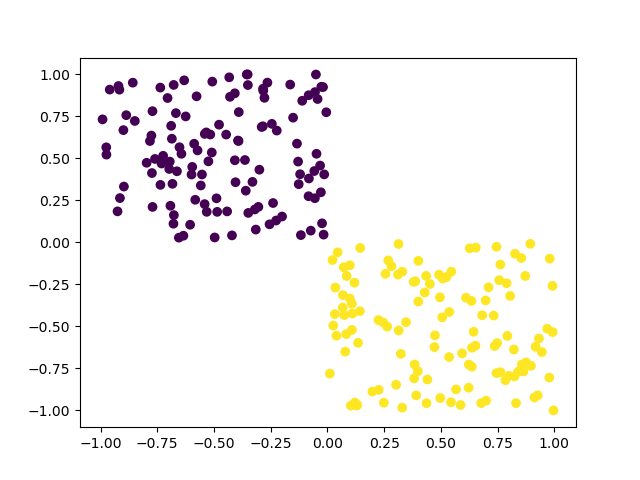

In [37]:
# Génération des données
n = 123
x, y = generateData(n)
# Affichage des données d'apprentissage
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
pl.show()

On peut tout de suite voir qu'il existe deux ensembles (<span style="color:#440154"><b>violet</b></span> et <span style="color:#fde725"><b>jaune</b></span>) visibles dans ce jeu de données et qu'il est linéairement séparable. L'outil qui permet de réaliser une séparation par un hyperplan entre 2 ensembles linéairement séparables est le perceptron binaire. On implémente donc l'algorithme du perceptron binaire.

In [38]:
def perceptron(x, y):
    w = np.zeros((x.shape[1]))
    sorted = False
    while not sorted:
        sorted = True
        for xi, yi in zip(x, y):
            if yi * np.dot(w, xi) <= 0:
                sorted = False
                w += yi * xi
    print("w =", w)
    return w

Ensuite on calcule le vecteur de pondération $w$ qui résulte du perceptron avec nos données et on représente la <span style="color:#ff7f0e">droite</span> générée par le vecteur de pondération sur un graphique.

w = [ 0.73105679 -0.46885415]


<IPython.core.display.Javascript object>


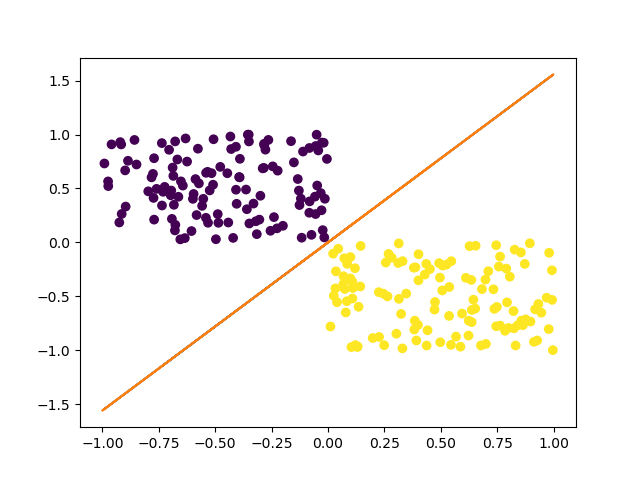

In [39]:
# Calcul du vecteur de pondération par le perceptron
w = perceptron(x, y)

#Affichage sur le graphique de la droite
pl.figure()
pl.plot(x, (-w[0] / w[1]) * x)
pl.scatter(x[:, 0], x[:, 1], c=y)
pl.show()

Pour tester le vecteur de pondération $w$ on va réaliser un ensemble de jeux de données de test et calculer l'erreur que la prédiction nous donne sur l'ensemble cet ensemble.

In [40]:
# Génération des données de test
x_test, y_test = generateData(n)

# Calcul de l'erreur
e = 0
for xi, yi in zip(x_test, y_test):
    prod_vect_xw = np.dot(xi, w)
    if (prod_vect_xw > 0 > yi) or (prod_vect_xw < 0 < yi):
        e += 1
print(e)

0


Le vecteur $w$ donne donc une prédiction parfaite, nous n'avons aucune erreur entre l'ensemble de test et l'ensemble prédit.

Enfin, nous avons vu le cas du perceptron sur des données séparables par un hyperplan passant par l'origine. Nous allons étudier le cas d'un hyperplan ne passant pas par l'origine.<br>
Voici le code qui génère les données pour ce cas :

In [41]:
def generateData2(n):
    """
    generates a 2D linearly separable dataset with 2n samples.returns X an array of 2D samples, and Y the samples label
    """
    xb = (rand(n) * 2 - 1) / 2 + 0.5
    yb = (rand(n) * 2 - 1) / 2
    xr = (rand(n) * 2 - 1) / 2 + 1.5
    yr = (rand(n) * 2 - 1) / 2 - 0.5
    inputs = []
    for i in range(n):
        inputs.append([xb[i], yb[i], -1])
        inputs.append([xr[i], yr[i], 1])
    data = np.array(inputs)
    X = data[:, 0:2]
    Y = data[:, -1]
    return X, Y

Nous représentons ces données sur un graphique :

<IPython.core.display.Javascript object>


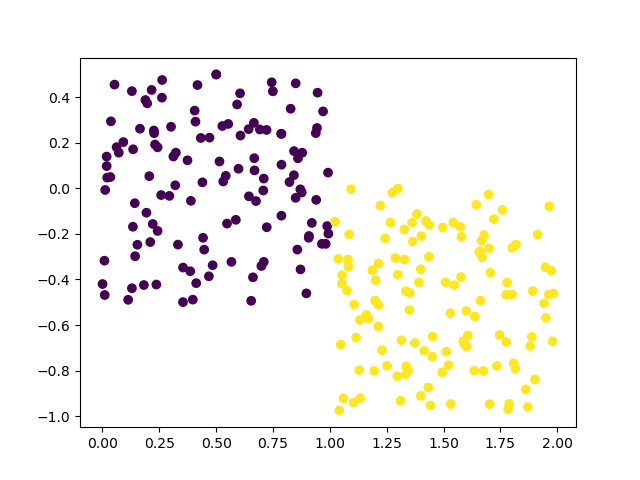

In [42]:
# Génération des données ne passant pas par l'origine
x, y = generateData2(n)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
pl.show()

On veut utiliser la technique qui permet de considérer nos données qui sont de dimensions $d$, donc dans $\mathbb{R}^{d}$, on va faire comme si elles étaient dans $\mathbb{R}^{d+1}$ et qu'elles avaient toutes 1 en dernière coordonnée.<br>
Du coup, on considère que $w$ est aussi de dimension $d+1$ et la dernière coordonnée de $w$ est $b$, le scalaire qui permet de générer un vecteur $w$ qui ne passe pas forcément par l'origine.

On définit une nouvelle fonction qui ajoute cette dimension aux données.

In [43]:
def complete(sample):
    return np.concatenate(
        (sample,
         np.ones((len(sample), 1))
         ),
        axis=1
    )

w = [ 3.75886591 -1.19039    -4.        ]


<IPython.core.display.Javascript object>


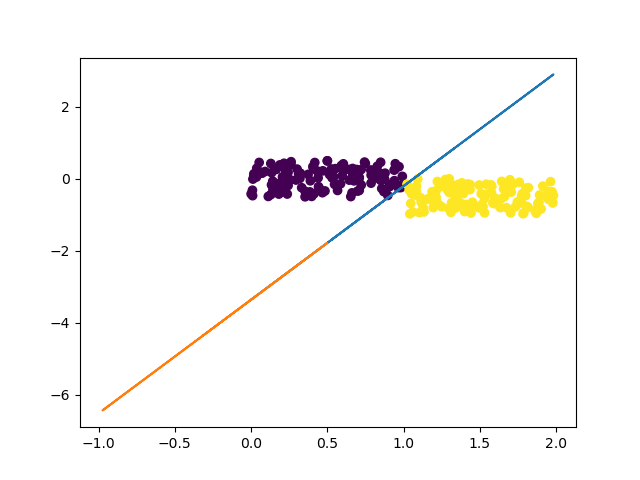

In [44]:
# Ajout d'un attribut à 1 pour chaque données
x = complete(x)

# Calcul du perceptron avec biais
w = perceptron(x, y)

# Représentation graphique de l'hyperplan avec les données
pl.figure()
# Utilisation de l'équation de la droite à partir du vecteur de pondération
pl.plot(x, (-w[0] / w[1]) * x - w[2] / w[1])
pl.scatter(x[:, 0], x[:, 1], c=y)
pl.show()

On peut calculer l'erreur avec le nouveau perceptron avec biais :

In [45]:
# Test de l'erreur avec biais
# Génération des données de test
x_test, y_test = generateData2(n)
x_test = complete(x_test)

# Calcul de l'erreur
e = 0
for xi, yi in zip(x_test, y_test):
    if (np.dot(xi, w) > 0 > yi) or (np.dot(xi, w) < 0 < yi):
        e += 1
print(e)

4


Il peut arriver que les données ne soient pas toujours totalement linéairement séparables et on trouve donc quelques erreurs selon l'itération, mais elles restent minoritaires et n'impactent pas le résultat. L'hyperplan sépare bien les deux ensembles et ne passe pas par l'origine.

## Perceptron à noyau

Pour représenter des données dans le cadre du perceptron à noyau, on implémente une nouvelle fonction :

In [46]:
def generateData3(n):
    """generates a non linearly separable dataset with about 2n samples.The third element of the sample is the label"""
    xb = (rand(n) * 2 - 1) / 2
    yb = (rand(n) * 2 - 1) / 2
    # (xb, yb) est dans le carré centré à l’origine de c^oté 1
    xr = 3 * (rand(4 * n) * 2 - 1) / 2
    yr = 3 * (rand(4 * n) * 2 - 1) / 2
    # (xb, yb) est dans le carré centré à l’origine de c^oté 3
    inputs = []
    for i in range(n):
        inputs.append(((xb[i], yb[i]), -1))
    for i in range(4 * n):
        # on ne conserve que les points extérieurs au carré centré à l’origine de c^oté 2
        if abs(xr[i]) >= 1 or abs(yr[i]) >= 1:
            inputs.append(((xr[i], yr[i]), 1))
    return inputs

<IPython.core.display.Javascript object>


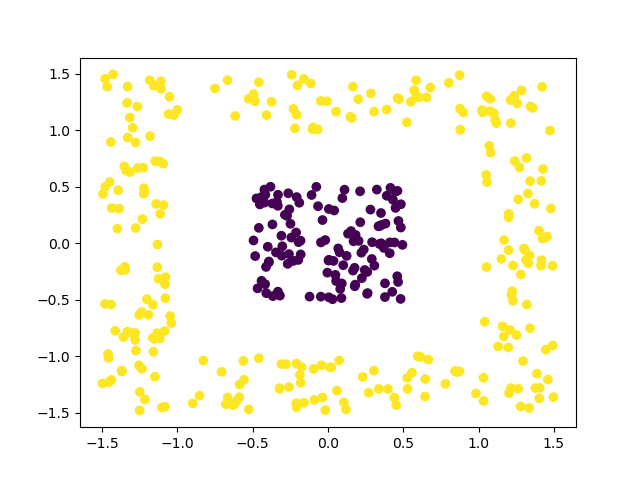

In [47]:
# Génération de données noyau
sample = generateData3(n)

# Formatage des données
x = [i[0] for i in sample]
x = [[i[0], i[1]] for i in x]
x = np.array(x)
y = [i[1] for i in sample]
y = np.array(y).reshape((-1, 1))

# Affichage sur un graphique des données
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
pl.show()

Dans le cas du perceptron à noyau, les données ne sont par linéairements séparables, c'est pour cela que l'on observe ce genre d'ensemble sur le graphique.

On cherche à plonger les données dans une dimension qui nous permet de les séparer.<br>
On considère le plongement $\phi : \mathbb{R}^{2} \rightarrow \mathbb{R}^{6}$ défini par $\phi(x,y) = (1,x,y,x², x * y, y²)$

In [48]:
#Fonction de plongement R2 à R6
def plongement(x):
    p = []
    for xi in x:
        pp = np.array([1, xi[0], xi[1], xi[0] ** 2, xi[0] * xi[1], xi[1] ** 2])
        p.append(pp)
    return np.array(p)

Pour représenter les données, on va former une séparation à partir de points calculés par le vecteur $w$.<br>
Pour réaliser cela on va calculer des points et les afficher s'ils sont proches de la séparation entre les deux classes.

In [49]:
#Fonctions d'affichage des résultats
def f(w, x):
    w = w.reshape((-1, 1))
    x = plongement(x)
    return np.dot(x, w)


def plotRect(w):
    res = 500
    for x in range(res):
        for y in range(res):
            # la fonction f va effectuer le calcul du produit scalaire <w,x> pour trouver la classe
            # On affiche les points qui sont à +- 0,01 de l'hyperplan d'après cette fonction f pour afficher les "contours" de l'hyperplan
            if abs(f(w, [[-3 / 2 + 3 * x / res, -3 / 2 + 3 * y / res]])) < 0.01:
                pl.plot(-3 / 2 + 3 * x / res, -3 / 2 + 3 * y / res, 'xb')
    pl.show()

w = [-2.          0.26808584  0.44278476  2.69788374 -0.02681608  3.8773536 ]


<IPython.core.display.Javascript object>


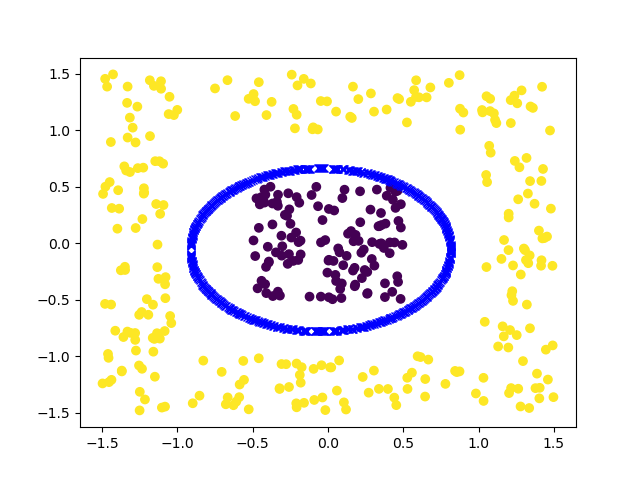

In [50]:
# Plongement des données en R6 puis calcul du perceptron à noyau
px = plongement(x)
w = perceptron(px, y)

# Représentation graphique des données
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRect(w)

Le plongement réalisé correspond à la fonction noyau $k_{1}$ définie par :<br>
$k_{1}((x_{1},y_{1}),(x_{2},y_{2})) = 1 + x_{1}x_{2} + y_{1}y_{2} + x_{1}^{2}x_{2}^{2} + x_{1}y_{1}x_{2}y_{2} + y_{1}^{2}y_{2}^{2}$

In [51]:
def k(a, b):
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    return  1 + x1*x2 + y1*y2 + ((x1**2)*(x2**2)) + x1*y1*x2*y2 + ((y1**2)*(y2**2))

Etant donné un échantillon $S = ((x_{1},y_{1}),...,(x_{n},y_{n}))$ où chaque $x_{i} \in \mathbb{R}²$, une fonction noyau $k : \mathbb{R}² \times \mathbb{R}² \rightarrow \mathbb{R}$, un ensemble de coefficients $c_{1},...,c_{n} \in \mathbb{N}$, l'ensemble $VS$ des exemples de coefficients non nuls ($VS = \{(x_{i}, y_{i})|c_{i} \neq 0\}$), on en déduit la fonction $f : \mathbb{R}²  \rightarrow \mathbb{R}$ définie par :<br>
$f(x) = \sum_{(x_{i},y_{i})\in VS} c_{i}y_{i}k(x_{i},x)$<br>
En effet, cette fonction nous permettra de déterminer la valeur prédite d'une de nos valeurs de l'échantillon.

In [52]:
def f_from_k(coeffs, support_set, k, x):
    t = 0
    for a, ss in zip(coeffs, support_set):
        xi = ss[0]
        yi = ss[1]
        t += a * yi * k(xi, x)
    return t

On définit la fonction du perceptron à noyau :

In [53]:
def perceptron_noyau(X, Y, k):
    coef = []
    support_set = []
    isSorted = True
    maxTour = 20
    co = 0
    while isSorted and co < maxTour :
        isSorted = False
        for x, y in zip(X, Y):
            if y * f_from_k(coef, support_set, k, x) <= 0:
                isSorted = True
                support_set.append((x, y))  # (x,y)
                coef += [1]
        co += 1
    return coef, support_set

La fonction $f\_from\_k : x \rightarrow \sum_{i=1}^{n}\alpha_{i}y^{i}k(x,x^{i})$ précédemment définie nous permet de réaliser la représentation graphique du classifieur<br>
On va calculer plusieurs valeurs autour du classifieur et afficher celles qui sont les plus proches (à O.01 près) pour le rendre visible.

In [54]:
coeff, support = perceptron_noyau(x, y, k)
print(coeff, support)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [(array([-0.18279644,  0.02254828]), array([-1])), (array([-1.23272591,  0.21356745]), array([1])), (array([ 0.02120535, -1.10000854]), array([1])), (array([-0.18279644,  0.02254828]), array([-1])), (array([ 0.12333961, -0.11241976]), array([-1])), (array([-0.41005439, -0.44213499]), array([-1])), (array([1.42300686, 0.04256825]), array([1])), (array([-0.06831361,  1.00735936]), array([1])), (array([ 0.12333961, -0.11241976]), array([-1])), (array([-0.38216241,  0.49979799]), array([-1])), (array([ 0.02120535, -1.10000854]), array([1])), (array([0.48340733, 0.34480874]), array([-1])), (array([ 0.48161334, -0.49341296]), array([-1])), (array([0.157598  , 1.10862261]), array([1]))]


<IPython.core.display.Javascript object>


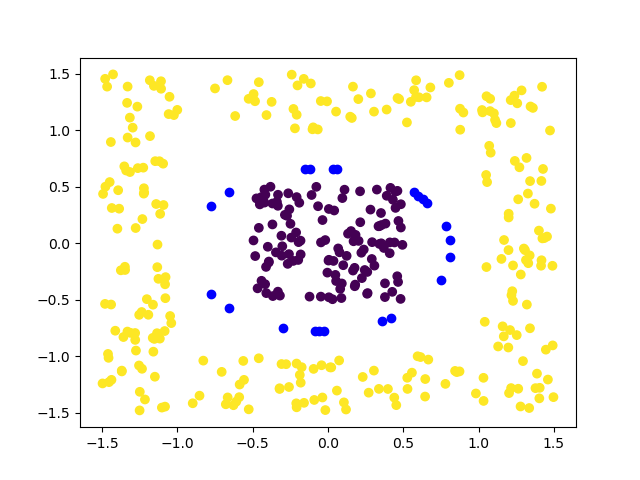

In [55]:
def plotRectK(coef,supp, fk):
    res = 100
    for x in range(res):
        for y in range(res):
            if abs(f_from_k(coef, supp, fk, [-3/2+3*x/res,-3/2+3*y/res]))<0.01:
                pl.scatter(-3/2 + 3*x/res, -3/2 + 3*y/res, color='b')
    pl.show()
    
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, k)

On obtient le même résultat que dans le perceptron précédent.

Nous allons maintenant tester le perceptron avec une autre fonction noyau, celle du noyau gaussien définie :

In [56]:
import math
def kg20(x,y):
    sigma=20
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg10(x,y):
    sigma=10
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg1(x,y):
    sigma=1
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg05(x,y):
    sigma=0.5
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)
def kg02(x,y):
    sigma=0.2
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/sigma**2)

<IPython.core.display.Javascript object>


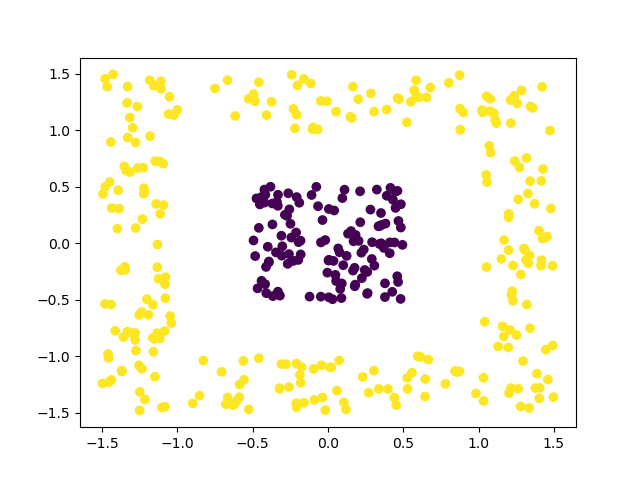

In [57]:
coeff, support = perceptron_noyau(x, y, kg10)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, kg10)

<IPython.core.display.Javascript object>


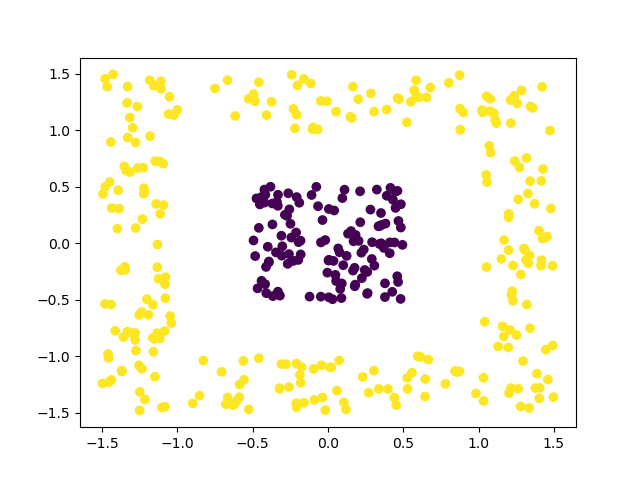

In [58]:
coeff, support = perceptron_noyau(x, y, kg20)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, kg20)

<IPython.core.display.Javascript object>


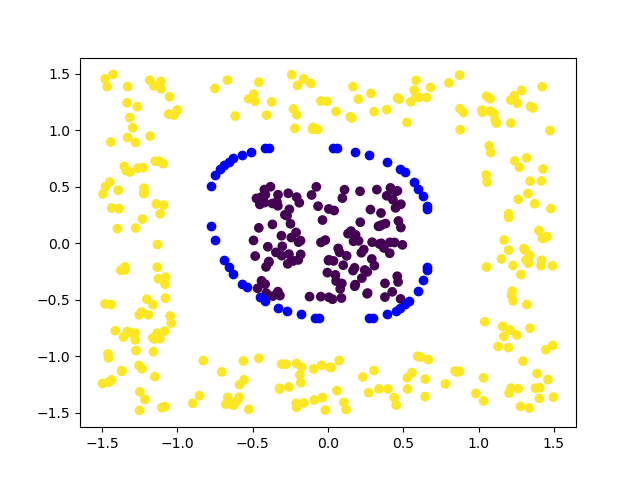

In [59]:
coeff, support = perceptron_noyau(x, y, kg1)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, kg1)

<IPython.core.display.Javascript object>


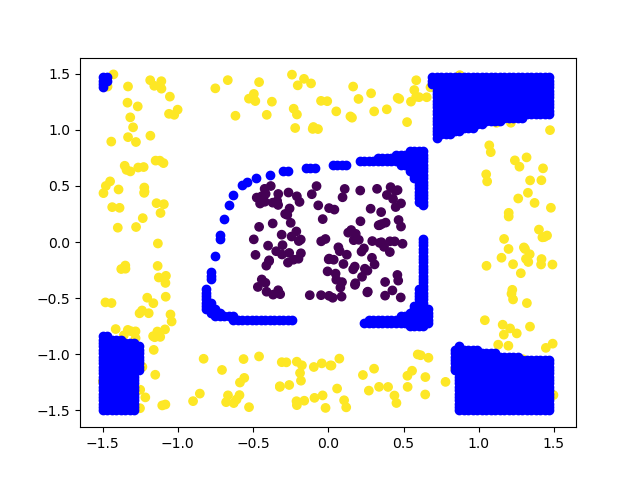

In [60]:
coeff, support = perceptron_noyau(x, y, kg05)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, kg05)

<IPython.core.display.Javascript object>


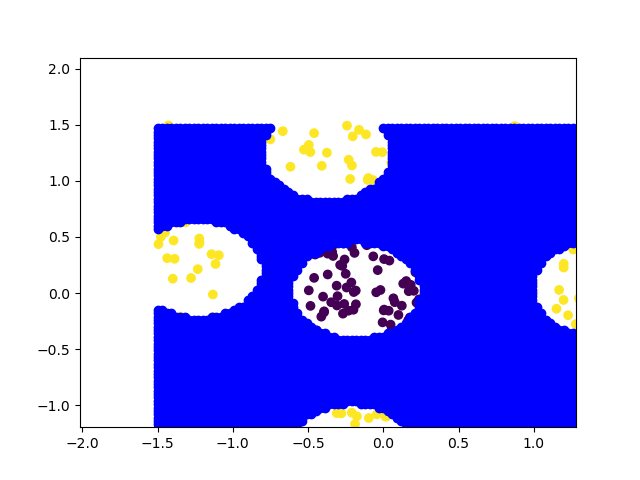

In [61]:
coeff, support = perceptron_noyau(x, y, kg02)
pl.figure()
pl.scatter(x[:, 0], x[:, 1], c=y)
plotRectK(coeff, support, kg02)

La conclusion sur l'utilisation du noyau gaussien,c'est que plus le coefficient sigma est élevé, moins la précision est grande. Donc si le coefficient est trop élevé, la classification sera trop précise et empêche de visualiser les résultats, alors que dans le cas inverse, si le coefficient est trop faible il va absolument mal classifier et la limite entre deux classes sera floue.